# CHICAGO CRIME PREDCITION ANALYSIS FOR 2018


Steps 
1) Importing Necessary Libraries
2) Reading data using the api link from website https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
    (there are multiple ways to read the data -- Either imporitng it using CSV and then reading it using pandas as pd.read_csv()
     or directly using aoi get request to read it)
3) Checking the Data 

## Importing Necessary Libraries

In [129]:
import requests
from fbprophet import Prophet
from pandas.io.json import json_normalize 
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline


## Fetching Data from the link -- 
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
There are multiple ways to fetch the data -- 
1) 1st method -- Directly using requests.get method and then normalizing it
2) downaloading the csv from the link and then loading it

In [219]:
# Method -1 (not using)
#Crimes = requests.get("https://data.cityofchicago.org/resource/6zsd-86xi.json").json()
# Normalizing the JSON data to dataframe
#Crimes = json_normalize(Crimes)
#Crimes.head()

In [130]:
#Loading the data in pandas dataframe
data = pd.read_csv('C:/Users/deepti/Downloads/Crimes.csv',error_bad_lines=False)
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [131]:
# No duplicates in data , Checking shape of data (Although this is not the right way to check duplicates , 
# its better to create a frequency chart . I did this way to save time, if there are any duplicates than dropping it directly)
print('Dataset Shape before drop_duplicate : ', data.shape)
data.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Dataset Shape after drop_duplicate: ', data.shape)

Dataset Shape before drop_duplicate :  (6691902, 22)
Dataset Shape after drop_duplicate:  (6691902, 22)


In [132]:
# converting data to pandas date time format
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y %I:%M:%S %p')
# adding datetime index
data.index = pd.DatetimeIndex(data.Date)
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 19:44:00,10000092,HY189866,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
2015-03-18 23:00:00,10000094,HY190059,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2015-03-18 22:45:00,10000095,HY190052,2015-03-18 22:45:00,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
2015-03-18 22:30:00,10000096,HY190054,2015-03-18 22:30:00,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
2015-03-18 21:00:00,10000097,HY189976,2015-03-18 21:00:00,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6691902 entries, 2015-03-18 19:44:00 to 2018-08-30 11:24:00
Data columns (total 22 columns):
ID                      int64
Case Number             object
Date                    datetime64[ns]
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), datetime64[ns](1), float64(7), int64(3), object(9)
memory usage: 1.1+ GB


### Data Visualization

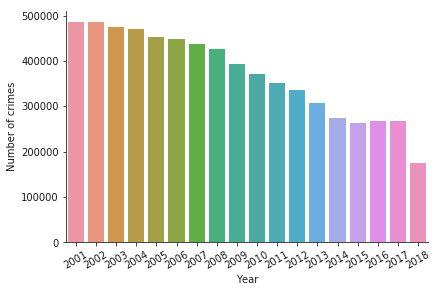

In [134]:
#Crimes over the years
g = sns.factorplot("Year", data=data, aspect=1.5, kind="count")
g.set_xticklabels(rotation=30)
plt.ylabel('Number of crimes')
plt.show()

In [136]:
#Creating a class which groups the data by different columns and outputs the graph. It also shows the trend analysis of the crime
class CrimeAnalysis:
    def __init__(self,y):
        self.y = y
    
    def analysis_count(self):
        Crime_count = pd.DataFrame(data.groupby(self.y)['ID'].size().sort_values(ascending = False).rename('counts').reset_index())
        sns.set_color_codes("pastel")
        f, ax = plt.subplots(figsize=(6, 2))
        sns.barplot(x="counts", y=self.y, data=Crime_count.iloc[:5, :], color="b")
        ax.legend(ncol=2, loc="lower left", frameon=True)
        ax.set(ylabel="Crime",xlabel="Number of Crimes")
        
    def analysis_trend(self):
        Crime_count = pd.DataFrame(data.groupby(self.y)['ID'].size().sort_values(ascending = False).rename('counts').reset_index()).iloc[:5, :]
        #pd.DataFrame(data[data['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE'])]['Primary Type'])
        values = Crime_count[self.y]
        Crime_type_analysis = pd.DataFrame(data[data[self.y].isin(values)][self.y])
        Crime_type_agg = Crime_type_analysis.groupby([pd.TimeGrouper('M'), self.y])
        result = Crime_type_agg[self.y].count().unstack()
        result.plot()
        plt.title("Top 5 crime trend")
        plt.show()
    


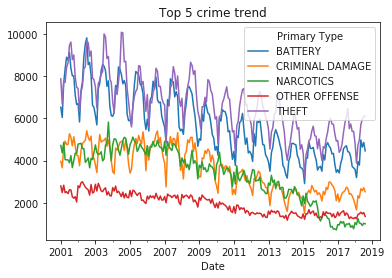

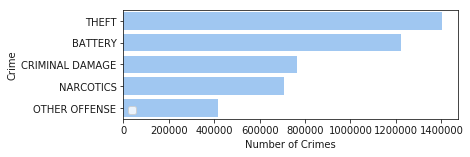

In [137]:
# Top 5 Types of Crimes and their trend
crimeType = CrimeAnalysis("Primary Type")
crimeType.analysis_trend()
crimeType.analysis_count()



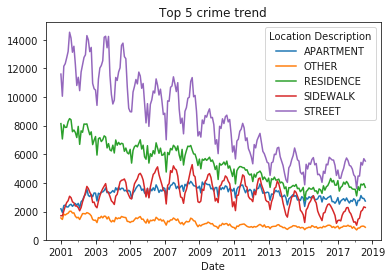

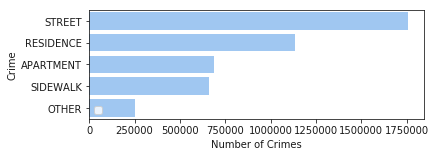

In [138]:
# Similarly Top 5 Location for Crimes and their Trend
crimeType = CrimeAnalysis("Location Description")
crimeType.analysis_trend()
crimeType.analysis_count()

#Top 3 Crime Locations are -- Street, Residence and Apartments
#Lets find out the crimes in these top 3 locations
#First lets see the correlations between them

### Data Preparation for fb prophet library 

In [167]:
# Preparing training and test data -- data before 2018 as training data and 2018 data as test data
#The input to Prophet is always a dataframe with two columns: ds and y. 
#The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or 
#YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.
train_data = data[data['Year'] != 2018]
test_data = data[data['Year'] == 2018]
training_data = train_data[['Date','ID']]
training_data.columns = ['ds','y']
training_data.ds = pd.to_datetime(training_data.ds, format='%m/%d/%Y %I:%M:%S %p')
training_data.index = pd.DatetimeIndex(training_data.ds)
tf = training_data.resample('M').size()
Final_train_data = tf.reset_index()
Final_train_data.columns = ['ds', 'y']
test_data = test_data[['Date','ID']]
test_data.columns = ['ds','y']
test_data.ds = pd.to_datetime(test_data.ds, format='%m/%d/%Y %I:%M:%S %p')
test_data.index = pd.DatetimeIndex(test_data.ds)
test = test_data.resample('M').size()
Final_test_data = test.reset_index()
Final_test_data.columns = ['ds', 'y']
Final_train_data.head()

,ds,y
0,2001-01-31,38097
1,2001-02-28,33779
2,2001-03-31,40553
3,2001-04-30,40079
4,2001-05-31,41821


### Fitting the model

In [169]:
#Before we can do any analysis with this data, 
#we need to log transform the ‘y’ variable to a try to convert non-stationary data to stationary. 
#This also converts trends to more linear trends
m = Prophet()
Final_train_data['y_orig'] = Final_train_data['y'] # to save a copy of the original data
Final_train_data['y'] = np.log(Final_train_data['y'])
m.fit(Final_train_data)
Final_train_data.head()

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,y,y_orig
0,2001-01-31,10.547891,38097
1,2001-02-28,10.427595,33779
2,2001-03-31,10.610365,40553
3,2001-04-30,10.598608,40079
4,2001-05-31,10.641154,41821


### Making Predictions for year 2018( since we have data till 8th month for testing - we can predict further also but as of now I am predicting till 8th month of 2018)

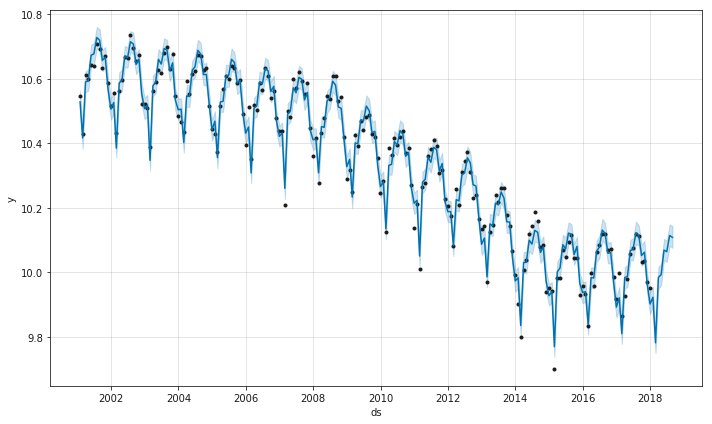

In [170]:
#Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made
future = m.make_future_dataframe(periods=8,freq = 'm')
#The predict method will assign each row in future a predicted value which it names yhat.
forecast = m.predict(future)
forecast.tail()
m.plot(forecast)

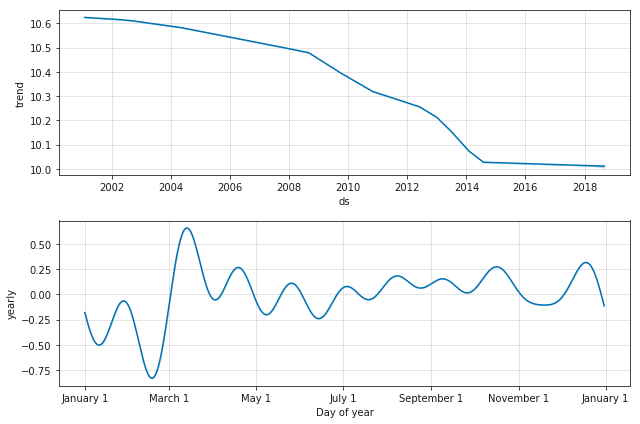

In [171]:
#Forecast broken down to trend and yearly seasonality
m.plot_components(forecast);

In [172]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
207,2018-04-30,9.992691,9.959706,10.025976
208,2018-05-31,10.068737,10.037376,10.103970
209,2018-06-30,10.064047,10.032196,10.097995
210,2018-07-31,10.114199,10.081655,10.149010
211,2018-08-31,10.108173,10.075759,10.143544


In [173]:
# since we took the log initially beofre making the predictions, now we need to revrert the data in original format by taking exponential
forecast_data_orig = forecast # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

In [174]:
forecast_data_orig[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
207,2018-04-30,21866.069704,21156.566907,22606.123728
208,2018-05-31,23593.746083,22865.294757,24439.833937
209,2018-06-30,23483.341872,22747.167311,24294.240046
210,2018-07-31,24691.123894,23900.519640,25565.788861
211,2018-08-31,24542.776224,23760.004228,25426.418154


In [177]:
# Calculate root mean squared error.
final = forecast_data_orig.loc[forecast_data_orig['ds'] >= '2018'].reset_index()
f = final[['ds','yhat']]
a = f.join(Final_test_data.set_index('ds'), on='ds')
print('RMSE: %f' % np.sqrt(np.mean((a['yhat']-a['y'])**2)) )

RMSE: 649.529007


### Let's try some other method which groups the predictions based on Crime primary type - multivariate regression problem
For this we are considering top three categories of crime type - "THEFT" "BATTERY" and "CRIMINAL DAMAGE"

In [178]:
# finding the number of crimes based on different Categoies (CRIME TYPE) over the years
Crime_count = pd.DataFrame(data.groupby('Primary Type')['ID'].size().sort_values(ascending = False).rename('counts').reset_index()).iloc[3, :]
values = Crime_count['Primary Type']
Crime_type_analysis = pd.DataFrame(data[data['Primary Type'].isin(['THEFT','BATTERY','CRIMINAL DAMAGE'])]['Primary Type'])
Crime_type_agg = Crime_type_analysis.groupby([pd.TimeGrouper('M'), 'Primary Type'])
result = Crime_type_agg['Primary Type'].count().unstack()
result.reset_index
result1 = Crime_type_agg['Primary Type'].count()
df = result1.unstack().reset_index()
newData = df.rename_axis("id", axis="columns")
newData.head()

id,Date,BATTERY,CRIMINAL DAMAGE,THEFT
0,2001-01-31,6525,3966,7866
1,2001-02-28,6040,3664,6669
2,2001-03-31,7659,4615,7765
3,2001-04-30,8325,4922,7702
4,2001-05-31,8887,4756,8417


In [179]:
# Correlation matrix ---> the correlation between these variables is very high, 
#therefore we it is advisable not to run separate models on each, 
#the model will not give good accuracy
newData.corr()

id,BATTERY,CRIMINAL DAMAGE,THEFT
id,,,
BATTERY,1.000000,0.936925,0.902069
CRIMINAL DAMAGE,0.936925,1.000000,0.893984
THEFT,0.902069,0.893984,1.000000


In [181]:
# Preprocessing the data- dividing it into training and testing
newData['year'] = newData['Date'].dt.year
train_x = newData[newData['year'] != 2018]
train_x_final = train_x[['Date']]
train_y = train_x[['BATTERY','CRIMINAL DAMAGE','THEFT']]
train_y = train_y
test_x = newData[newData['year'] == 2018]
test_x_final = test_x.Date
test_y = test_x[['BATTERY','CRIMINAL DAMAGE','THEFT']]
train_x_final.head()

id,Date
0,2001-01-31
1,2001-02-28
2,2001-03-31
3,2001-04-30
4,2001-05-31


### Creating model  using MultiOutputRegressor and GradientBoostingRegressor

#### Future Works

In [127]:
# Future work --  It is still in progress --- since it is a time series problem, soI am still trying to find how to incorporate that
#ALthough we can also try KNN method.

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
ESTIMATORS = {
    
    "MultiOP GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=3)),
    
}
for name, estimator in ESTIMATORS.items():
    m=estimator.fit(train_x_final,train_y)
    estimator.predict(test_x)



TypeError: float() argument must be a string or a number, not 'Timestamp'